In [1]:
import math, random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

from Crypto.Hash import SHA3_256, HMAC
from Crypto.Protocol.KDF import HKDF

%matplotlib inline

In [2]:
FLAG = "nland{h4ppy_tree_friend}"

In [3]:
SECRET = b"3" # chosen by fair dice roll
h = HMAC.new(SECRET, digestmod=SHA3_256)

def getkey(n):
    return h.copy().update(n.to_bytes(length=2, byteorder='little')).hexdigest()

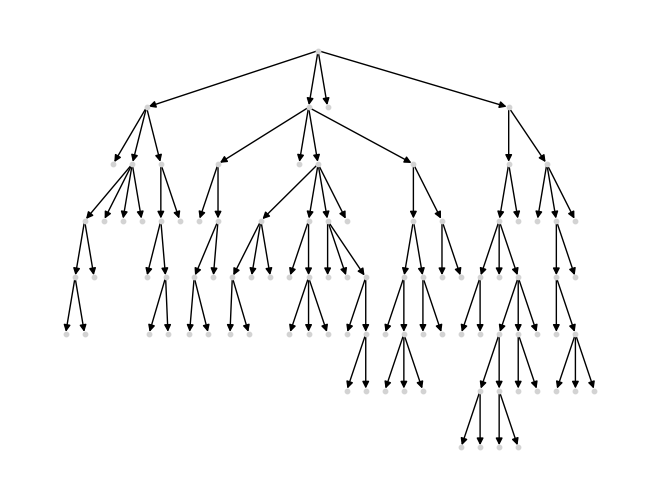

In [77]:
graph = nx.DiGraph()
i = 0

def traverse(node, depth = 200, N = 4, maxdepth = -1):
    global i    
    if maxdepth == -1:
        maxdepth = depth
        
    if depth > 0:
        n = np.random.binomial(N, (1.3) ** (-1 * (maxdepth - depth)))
        if n > 1:
            # display(f"traverse({node=}, {depth=}, {N=}, {maxdepth=})")
            nodes = []
            for _ in range(n):
                i = i + 1
                nodes.append(i)
                graph.add_edge(node, i)
            for node in nodes:
                traverse(node, depth - 1, N, maxdepth)

traverse(i, depth=15, N = 4)
nx.draw(graph, pos=nx.nx_agraph.graphviz_layout(graph, prog="dot"), with_labels=False, node_size=10, node_color="lightgray")

In [78]:
root = 0
G = nx.bfs_tree(graph, root)
edges = list(nx.bfs_edges(G, 0))
leaves = list(filter(lambda edge: G.out_degree(edge[1]) == 0, edges))
hits = [leaves[idx] for idx in sorted(random.sample(range(len(leaves)), len(FLAG)))]
chars = dict(zip(hits, FLAG))
weights = {n: "" for n in edges} | { n: chars.get(n, "NIETE") for n in leaves }
weights[edges[1]] = "https://www.youtube.com/watch?v=dQw4w9WgXcQ"
for k,v in weights.items():
    G.edges[k]["value"] = v
display(f"{ len(list(edges)) } edges, { len(leaves) } leafs, { len(G.nodes) } nodes")

'95 edges, 57 leafs'

In [82]:
display({edge: G.edges[edge]["value"] for edge in G.edges})

{(0, 1): '',
 (0, 2): 'https://www.youtube.com/watch?v=dQw4w9WgXcQ',
 (0, 3): 'NIETE',
 (0, 4): '',
 (1, 5): 'n',
 (1, 6): '',
 (1, 7): '',
 (2, 22): '',
 (2, 23): 'l',
 (2, 24): '',
 (2, 25): '',
 (4, 66): '',
 (4, 67): '',
 (6, 8): '',
 (6, 9): 'NIETE',
 (6, 10): 'NIETE',
 (6, 11): 'NIETE',
 (7, 16): '',
 (7, 17): 'NIETE',
 (22, 26): 'a',
 (22, 27): '',
 (24, 32): '',
 (24, 33): '',
 (24, 34): '',
 (24, 35): 'n',
 (25, 53): '',
 (25, 54): '',
 (66, 68): '',
 (66, 69): 'd',
 (67, 86): 'NIETE',
 (67, 87): '',
 (67, 88): 'NIETE',
 (8, 12): '',
 (8, 13): '{',
 (16, 18): 'NIETE',
 (16, 19): '',
 (27, 28): '',
 (27, 29): 'NIETE',
 (32, 36): '',
 (32, 37): 'h',
 (32, 38): 'NIETE',
 (33, 41): 'NIETE',
 (33, 42): '',
 (34, 46): 'NIETE',
 (34, 47): '4',
 (34, 48): '',
 (53, 55): '',
 (53, 56): '',
 (54, 64): 'NIETE',
 (54, 65): 'p',
 (68, 70): '',
 (68, 71): 'NIETE',
 (68, 72): '',
 (87, 89): '',
 (87, 90): 'NIETE',
 (12, 14): 'p',
 (12, 15): 'y',
 (19, 20): 'NIETE',
 (19, 21): 'NIETE',
 (28, 

## Easteregg!

## Contract stuff

```yul
object "Payer" {
   code {
        datacopy(0, dataoffset("runtime"),datasize("runtime"))
        return(0, datasize("runtime"))
    }
    object "runtime" {
        code {
        for { let i := 0 } lt(i, calldatasize()) { i := add(i, 0x60) } {
            let message := calldataload(add(i, 0x40))
            mstore(0x00, shl(8, message))
            log0(0x00, byte(0, message))
            pop(call(0xFFFF, calldataload(i), calldataload(add(i, 0x20)), 0x00, byte(0, message), 0, 0))      
        }
        }
    }
}
```

In [62]:
def encode_abi(to, amount, msg):
    return (
        bytes.fromhex(to.lstrip("0x")).rjust(32, b"\x00") 
        + amount.to_bytes(32, byteorder='big')
        + len(msg).to_bytes(1, byteorder='big')
        + msg.ljust(31, b"\x00")
    ).hex()

In [63]:
bytecode = "0x" + "603e600d600039603e6000f3fe60005b36811015603c5760408101358060081b6000528060001a6000a06000808260001a60006020860135863561fffff150506060810190506002565b50"
args = encode_abi("0xe2d28d21e9c3FD9a24B310506a9b71640021Dc53", w3.toWei("1", "ether"), b"Hello")
data = bytecode + args

In [31]:
import web3
from web3 import Web3
from web3.gas_strategies.rpc import rpc_gas_price_strategy
from web3.gas_strategies.time_based import fast_gas_price_strategy

In [418]:
account_from = {
    "private_key": "0xc1ed4201c642ee1621529fee9961f375a0d46752fc25d1bde7098dc4cbd6a661",
    "address": "0x22331e319FB0bc6992372DAE87Aa88430Ec4fBDe",
}

w3 = Web3(Web3.HTTPProvider('http://localhost:7545'))
w3.isConnected()

True

In [33]:
w3.eth.set_gas_price_strategy(fast_gas_price_strategy)

## Transactions

At this point, I figured out that using a SmartContract for this challenge sucks because transactions from a SmartContract count as "internal" and can not be displayed properly with CallData. Let it be single transactions then.

In [84]:
account_to = w3.eth.account.privateKeyToAccount(getkey(root))
display(account_to.address)

'0x60B268593E71E3ADa6Dc33982d9b2bEBB38C65C1'

In [83]:
funds = w3.fromWei(len(G.edges) * w3.toWei(30, 'gwei') * 30_000, 'ether')
display(f"Need {funds} ether")

'Need 0.0855 ether'

In [85]:
nonces = { node: 0 for node in G.nodes }

In [86]:
def transfer(node, child, value, data, simulate=True):
    gasPrice = w3.toWei(30, 'gwei')
    display(f"{node} -> {child}: {value}")
    account_from = w3.eth.account.privateKeyToAccount(getkey(node))
    account_to = w3.eth.account.privateKeyToAccount(getkey(child))
    
    assert(value >= 0)
    
    tx = w3.eth.account.sign_transaction(
        {
            "nonce": nonces.get(node, 0),
            "to": account_to.address,
            
            "value": value,
            "data": data,
            
            "gas": 30_000,
            "gasPrice": gasPrice
        },
        account_from.privateKey
    )
    
    if simulate:
        display(tx.rawTransaction)
        tx_hash = None
    else:
        tx_hash = w3.eth.send_raw_transaction(tx.rawTransaction)
        # tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)        
    nonces[node] = nonces.get(node, 0) + 1
    return tx_hash

In [87]:
layers = nx.bfs_layers(G, 0)
next(layers) # skip first
for layer in tqdm(layers):
    transactions = []
    
    for child in layer:
        node = next(G.predecessors(child))
        edge = (node, child)
        data = G.edges[edge]["value"].encode()
        value = len(nx.descendants(G, child)) * 30_000 * w3.toWei(30, 'gwei')
        tx_hash = transfer(node, child, value, data, simulate=False)
        transactions.append(tx_hash)
        
    for tx_hash in transactions:
        tx_receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
        display(f"Transaction confirmed with hash: { tx_receipt.transactionHash.hex() }")

0it [00:00, ?it/s]

'0 -> 1: 15300000000000000'

'0 -> 2: 39600000000000000'

'0 -> 3: 0'

'0 -> 4: 27000000000000000'

'Transaction confirmed with hash: 0xb319857dfc31cdbedd1f4cf418a3e02ce1efee9470c5c3b1cdad5fa446106a99'

'Transaction confirmed with hash: 0xa74a0a0b495e930143e1e463033b6f5370accdc94b57d3e698887afa18f72078'

'Transaction confirmed with hash: 0x2e15aacfa4cbc2cc1d0f125f1a46507490046ba43d403f61d148734aa1a16735'

'Transaction confirmed with hash: 0x1b5e549f9cb729ba4a4b608e1b37f44355ba11217c01555432a5a5f8102a2889'

1it [00:22, 22.19s/it]

'1 -> 5: 0'

'1 -> 6: 7200000000000000'

'1 -> 7: 5400000000000000'

'2 -> 22: 5400000000000000'

'2 -> 23: 0'

'2 -> 24: 18900000000000000'

'2 -> 25: 11700000000000000'

'4 -> 66: 16200000000000000'

'4 -> 67: 9000000000000000'

'Transaction confirmed with hash: 0x5985c83ea0ddfd05875c59f957682c0980a1ec36e64c68a61563f00a5bb39963'

'Transaction confirmed with hash: 0xdd9f1b6ff9a74190d45d57e9885dc981f826a9b5c6fb2f2f8bed825e70fc8cd8'

'Transaction confirmed with hash: 0x67e01185e4c583554b4976f135878cf52ee7212166796ebdf8a069edfdd65798'

'Transaction confirmed with hash: 0x57e162e7aa2cfc619f75ecb85fd9c18cbf746e081180a5d017bafa1692565362'

'Transaction confirmed with hash: 0x45f7917e5180c1bd823f29b0f18f60efad28a048454c81b627224c6ba9f3aa24'

'Transaction confirmed with hash: 0x54ab09cdaef7af141c1c8ec6b5ac6915e14acd773f94d34457b02fc2f3f12d73'

'Transaction confirmed with hash: 0xbe55827a681fb145eaff2f755eb0de14bd883afb8c427ecc5eafcbcadffe4292'

'Transaction confirmed with hash: 0x4262f765749f7a7084d07962ba94fe4b803d728532f49fa4669b27cda6e30d50'

'Transaction confirmed with hash: 0xd1ad6d95c2dd9ca207932f07e6fe36c47443701bbe9e7c3e38e926891ed99f12'

2it [00:46, 23.65s/it]

'6 -> 8: 3600000000000000'

'6 -> 9: 0'

'6 -> 10: 0'

'6 -> 11: 0'

'7 -> 16: 3600000000000000'

'7 -> 17: 0'

'22 -> 26: 0'

'22 -> 27: 3600000000000000'

'24 -> 32: 4500000000000000'

'24 -> 33: 4500000000000000'

'24 -> 34: 6300000000000000'

'24 -> 35: 0'

'25 -> 53: 8100000000000000'

'25 -> 54: 1800000000000000'

'66 -> 68: 14400000000000000'

'66 -> 69: 0'

'67 -> 86: 0'

'67 -> 87: 6300000000000000'

'67 -> 88: 0'

'Transaction confirmed with hash: 0x4a97e12abe34bda2d75afb48c15fe1d6df48006fbcbd76f79ea737cdc099ad85'

'Transaction confirmed with hash: 0xf4875fa8a75b5ef760fd08bcb24a2cea31f73de41d16043459e63ef412b0e3f3'

'Transaction confirmed with hash: 0x75b260bef588e373bbba32ce10e2529bb5afdc4fb942f93569c66c14608008b6'

'Transaction confirmed with hash: 0x39ab7152de20c927ace6945c717315b5fb343d21f5994009d5cfd04dc4a896e6'

'Transaction confirmed with hash: 0x0bee94399274816e995052402b802893fe9ad88e9c6f2c844d875ab409cf45e7'

'Transaction confirmed with hash: 0xf093c72cb5383cd42002224fe87aad9d51315afbafd475211e7ce998ca4cdeaa'

'Transaction confirmed with hash: 0x20292a9049b0055560d38f9fa26b086fcb8b2d55ea3b8a41bb97e2a82bb4d65f'

'Transaction confirmed with hash: 0xee59086bd51eb510b2dcd91c20d08b01c5ca520926f1c58e60a5042ad40db432'

'Transaction confirmed with hash: 0xfb2205b30c01d5434d97b338c02e740567530496eb1a8e1f3fbd318ac8e50172'

'Transaction confirmed with hash: 0xa33060b0fdb9adaeb14d8f6dfb120f65275581b57a5cc15c24821e426a5d53db'

'Transaction confirmed with hash: 0x212ec12e058a4f18f06f6663c08dd8bfef697b11a0e0bb6e9472b10936266581'

'Transaction confirmed with hash: 0x4baeb7a81520b3444d58bc4bbbdd1c03c139b6e5bbfa5ae219665929d85bdd5f'

'Transaction confirmed with hash: 0x33266d36585027752bf1ba66e5e7613e2e695681281dcfde677634539481b553'

'Transaction confirmed with hash: 0x35adb787b700ae62399b2807583d7720c33bcf6cacff014aca0b812ed7668511'

'Transaction confirmed with hash: 0xbbe0d47d630f6013f2fbb7d5a0b7b162f76146046a4c3d837e9dd14d390ba504'

'Transaction confirmed with hash: 0x5f507bf7350090bd1bdcd7c717ab252467f012536a90284595ff7965f29d1dc3'

'Transaction confirmed with hash: 0xc54d36c9f50a05c697289121ff8eeb3433774b7345717b6c1b57b9ff88e116a2'

'Transaction confirmed with hash: 0x3b83874d1cd8cbce40711a246d014aabb85344149a09eafcc3534622b81cd680'

'Transaction confirmed with hash: 0x4f7432663791dce1f52d48bd041b48316c384f3e3d78498801047144cbb1c030'

3it [01:15, 25.90s/it]

'8 -> 12: 1800000000000000'

'8 -> 13: 0'

'16 -> 18: 0'

'16 -> 19: 1800000000000000'

'27 -> 28: 1800000000000000'

'27 -> 29: 0'

'32 -> 36: 1800000000000000'

'32 -> 37: 0'

'32 -> 38: 0'

'33 -> 41: 0'

'33 -> 42: 2700000000000000'

'34 -> 46: 0'

'34 -> 47: 0'

'34 -> 48: 3600000000000000'

'53 -> 55: 4500000000000000'

'53 -> 56: 1800000000000000'

'54 -> 64: 0'

'54 -> 65: 0'

'68 -> 70: 1800000000000000'

'68 -> 71: 0'

'68 -> 72: 9900000000000000'

'87 -> 89: 4500000000000000'

'87 -> 90: 0'

'Transaction confirmed with hash: 0x109c1f59d8755051509abde9d918b91016924d8d41c3e86279eabecd77741643'

'Transaction confirmed with hash: 0xa76c343ffedc578057d8477e65c1773686250937a53d28e3c64a2c8f7b36c208'

'Transaction confirmed with hash: 0xb09d37fbce61ebdf23cb0a52182998bc7b3d9b587450be7bdf84b6eda400b0b4'

'Transaction confirmed with hash: 0x22f54ef8c6bf6d9a59c28e3efbd7ab5f6935bd1d62f11c3255d7bf545df426b1'

'Transaction confirmed with hash: 0x9cfd093a340940bf5ceb4fb55fc15dc35e352c91b3b542876c4084dc0417ddcb'

'Transaction confirmed with hash: 0x924a7fed66df9ee307dde35605adc05aa63c3b99e10ec1d344901067c8a48922'

'Transaction confirmed with hash: 0xb5fc4de691f57b7e7e3654b372ad5ff6083ba429eaf7f46226de10fa4d6b5697'

'Transaction confirmed with hash: 0x790a3c8277c44940c9d88884474fd92fb1d621c152e27a070efbf65a45fa8885'

'Transaction confirmed with hash: 0x62147199ab17499bf339608320b6de817ec55b3ed9b39da970e1d024edfcb4dd'

'Transaction confirmed with hash: 0xd7bb56146d66b95f937a09dbb7127f2890aecb4d4be5ac3bf47b0b3e030972d5'

'Transaction confirmed with hash: 0x187a6f35da1aa9090f106d479a5625eff2e779317e2112272a71cca2aa9c0b5f'

'Transaction confirmed with hash: 0x5939b70e5f3dabed2d657021f0b48e0192f21bbeb1047ca58e807e8c99dc1b1c'

'Transaction confirmed with hash: 0xc53dab954cc1c38d99d0f31fedf9d7faea8a9f73a82b7f8996f2d09b43ded61e'

'Transaction confirmed with hash: 0x6ca057fbf940d72f70261dc360d9c5c0ffb3963601004de959f594bf066bd0f2'

'Transaction confirmed with hash: 0x018d318bb6993cf3689ff0f0714b7461539a1993daa3a755ae9fc401e038ca45'

'Transaction confirmed with hash: 0x05e1cd817d4d35d8b172e6b81422b95aa8834f786a0acf944692f6ef56c99c5b'

'Transaction confirmed with hash: 0xe020bc5fe9504faba851df5bba02462f73955d292b6dc8faafb65e0da89afbbd'

'Transaction confirmed with hash: 0xdd0525d59b89bb521f9aa86fcf4e6ef10e2fa7ea148200e32b261ecae34c94cd'

'Transaction confirmed with hash: 0x573d0016101f153d16785601e5cd468038eda6711f830cbb3191ed7412e2ecdc'

'Transaction confirmed with hash: 0xe07603b9953121fd37062720dcc04227fd8eaea6a3d6aba5fd615c432907b54b'

'Transaction confirmed with hash: 0x41db1e03f9e7905972ec12c6171889a01d5955b51e6f5ea7fcadd2e4e39130d4'

'Transaction confirmed with hash: 0x6fed5006d3a70a206782a54cb6d7a855ed337c6664924b2cff46d66dd746b261'

'Transaction confirmed with hash: 0x4314c18de26eab5baab6ddbf063bdc315ad97c7482248761603e3a0e5c51d8ff'

4it [01:48, 28.72s/it]

'12 -> 14: 0'

'12 -> 15: 0'

'19 -> 20: 0'

'19 -> 21: 0'

'28 -> 30: 0'

'28 -> 31: 0'

'36 -> 39: 0'

'36 -> 40: 0'

'42 -> 43: 0'

'42 -> 44: 0'

'42 -> 45: 0'

'48 -> 49: 0'

'48 -> 50: 1800000000000000'

'55 -> 57: 0'

'55 -> 58: 2700000000000000'

'56 -> 62: 0'

'56 -> 63: 0'

'70 -> 73: 0'

'70 -> 74: 0'

'72 -> 75: 5400000000000000'

'72 -> 76: 1800000000000000'

'72 -> 77: 0'

'89 -> 91: 0'

'89 -> 92: 2700000000000000'

'Transaction confirmed with hash: 0xe9a00637bddbadf3ded808e7ab93a209260a88cc34362069f127baf1c9a5a3cd'

'Transaction confirmed with hash: 0xe840959e394c867bfd0932674d9919ac6ce561f14d2ce3b865f33a31e7a9525f'

'Transaction confirmed with hash: 0xef642d45b78931983b66f26160809a1d80efb9709bc077949f34b49b062da6ef'

'Transaction confirmed with hash: 0x4ee2a261b947a084099f3ef8ee8514b6a8bd525406e22a1c845711196af1d120'

'Transaction confirmed with hash: 0xc68b475c2460652ec5eca47785a33a6277de7cf5c33ba564c74cb2c3698b7ab5'

'Transaction confirmed with hash: 0x68cc105a1c4772f40762c932ca2581db36b56f5847df880248e460a29dbf63b4'

'Transaction confirmed with hash: 0xee5206997aa41370f89e2ea722df076827d0be2c070e2765678415a2d43bf82d'

'Transaction confirmed with hash: 0x3c119019149ef657b78eeeb1027094c253cc2661f4592245ba61a7202ee06fca'

'Transaction confirmed with hash: 0x3302d86329ce34c779c19928fdabbeac6f219085e7bb71e2255a3eefe67bfa93'

'Transaction confirmed with hash: 0xf2c68ce3f49a225f730062d597a830836ac7424d94069cf20f090e57dde832a4'

'Transaction confirmed with hash: 0x7c47080bcbc098e17c172b4b8257498c0817a2b43bbb65702627160d3e9d21d2'

'Transaction confirmed with hash: 0x622d2031f07d0c17f3218dc8b4a5bd7518cbbc3181ab009d403cddc344b6c9fc'

'Transaction confirmed with hash: 0x4536a290a6f2f67d6b8749acf2dc91583975e6a5431c7158d0cf02c9d615405e'

'Transaction confirmed with hash: 0xef282b80aad1efb9003dab791dcab00ac46ca354539ceeabb5a895d653d44311'

'Transaction confirmed with hash: 0x241916394f54e83bccc043fde21d4d7bdb6b8fac5b89f7ea0a8c1757f12ee9cb'

'Transaction confirmed with hash: 0x4b516437fbec64112a7734164b5cf94617a6497479f1c32d92c66c7b4fbda311'

'Transaction confirmed with hash: 0xc2aecb08cd9478553d95ed1f438e19de36d323f225f774e9167ef795f40d92a1'

'Transaction confirmed with hash: 0x4f5010ef2f7a309ed2c73377f1af20df96b501a59e5ad21e8aadf1764f4cc104'

'Transaction confirmed with hash: 0xd8d40b6c7fd0f7026d97e0bbc347f434bfb8e6c6ffacd8e7567f49948cd8746f'

'Transaction confirmed with hash: 0xb0f710e718aba10d132c53fff20871dacc3891648d66900248333265c37a23ce'

'Transaction confirmed with hash: 0xb1c9e143a24b63c9bd7e2359544aaa5b79e6c70b24effa223b8f384ba48b853d'

'Transaction confirmed with hash: 0x3af316f3e9167b152a76f6577837ab0faa6ff1259f2c64886f132ef6d9bf7168'

'Transaction confirmed with hash: 0x48cd9d582893638e225af8b6aeabd7783339bfc633c77767112f3a567d7c0f20'

'Transaction confirmed with hash: 0x2fea394c958115fafdeb7cf8aab5c2b967c2c62c139262039d8262e12535baa7'

5it [02:12, 27.17s/it]

'50 -> 51: 0'

'50 -> 52: 0'

'58 -> 59: 0'

'58 -> 60: 0'

'58 -> 61: 0'

'75 -> 78: 1800000000000000'

'75 -> 79: 1800000000000000'

'76 -> 84: 0'

'76 -> 85: 0'

'92 -> 93: 0'

'92 -> 94: 0'

'92 -> 95: 0'

'Transaction confirmed with hash: 0xaeccac94252dc4f767ed1849b467476e2482fd0476cf83c8654cb2412772844c'

'Transaction confirmed with hash: 0x89c8ea708ecb637b52142b078ca05f71e6b5375c3412b0ea05a3f33ce490f7bf'

'Transaction confirmed with hash: 0x1fc5fc07c23c83ad7ec00ec5dc5be72d591e83ebb02a286437d127cdf53cbc1f'

'Transaction confirmed with hash: 0x24f4af863a6b0f05112b7a1ceb599e715961f2e939bc839e697782357d2444dd'

'Transaction confirmed with hash: 0xb8289085bedbb4e07c29a6e105f49dfdc483c15922e7cc258facb1ab38e63744'

'Transaction confirmed with hash: 0x2ea5182e2911f8a2f361df57e5b10405516a8967375f62b4ce6e613b13782494'

'Transaction confirmed with hash: 0x812a46ba1330772e3822a58a4a83ef43984d4e09d187b8d21f491644bb93520f'

'Transaction confirmed with hash: 0x41ade08b8af1180507479b2e6f26dd61e6e4f97844ae095810380c20a8387270'

'Transaction confirmed with hash: 0xe896bbb696cf5225374e05185699b2ebbefc02855455fe19d64ec417a69b43ce'

'Transaction confirmed with hash: 0xdbec84efbbd5231597e2b928eb09be3ab0581f384ef26775bfa6299780a80d6a'

'Transaction confirmed with hash: 0x772d41b07e69e1f9328c34c98e24365db66e86ad3037be9c53279879b452ded5'

'Transaction confirmed with hash: 0x907fa6aa541a747c3f8de0308bbed3c606efad429620215d02d98b9e0d62bc36'

6it [02:35, 25.54s/it]

'78 -> 80: 0'

'78 -> 81: 0'

'79 -> 82: 0'

'79 -> 83: 0'

'Transaction confirmed with hash: 0x539df159e53a797281be8c7321676c79c546c32e45c06eaa9d17bd7f773c9ea1'

'Transaction confirmed with hash: 0x8be51733ca4d122fc20f8558af7afa7be2430b0e65c410f7a97851f1b7b42c13'

'Transaction confirmed with hash: 0x99aab708d1f678ae04061a7b512125060c35322746acb6682efff8acf15fc8be'

'Transaction confirmed with hash: 0x1aeef9d65a3c79737b5c73f96d3bbe321cbf77d6373a3885f34cea600fa28373'

7it [02:46, 23.85s/it]


In [89]:
nx.write_gpickle(G, "challenge.pkl")